Working out this example:

https://multithreaded.stitchfix.com/blog/2018/06/21/constrained-optimization/

In [1]:
import numpy as np

stylist_workloads = {
    "Alex": 1,
    "Jennifer": 2,
    "Andrew": 2,
    "DeAnna": 2,
    "Jesse": 3
}

clients = (
    "Trista",
    "Meredith",
    "Aaron",
    "Bob",
    "Jillian",
    "Ali",
    "Ashley",
    "Emily",
    "Desiree",
    "Byron"
)

def get_happiness(seed=None):
    if seed:
        np.random.seed(seed)
    return dict(
        ((stylist, client), np.random.rand())
        for stylist in stylist_workloads
        for client in clients
    )

# Simple baseline: Random Assignment

In [2]:
# Simulate a single instance

# Generate happiness
tmp_happiness = get_happiness(666)

# Randomly assign stylists
tmp_stylists = np.repeat(list(stylist_workloads.keys()), list(stylist_workloads.values()))
np.random.shuffle(tmp_stylists)

# Get overall happiness outcome
tmp_outcome = [
    tmp_happiness[(s, c)]
    for s, c in zip(tmp_stylists, clients)
]

# Print status
print(f'''
Stylist order:
{tmp_stylists}

Happiness outcomes:
{tmp_outcome}

Total happiness outcome:
{sum(tmp_outcome)}
''')

del tmp_happiness, tmp_stylists, tmp_outcome


Stylist order:
['DeAnna' 'Jennifer' 'Jesse' 'Alex' 'Andrew' 'Jesse' 'Jesse' 'Jennifer'
 'DeAnna' 'Andrew']

Happiness outcomes:
[0.8888993137763092, 0.744154168814097, 0.15367390200000686, 0.7278580572480748, 0.9091795928395876, 0.2704089537503508, 0.5610344211351077, 0.11285765363170797, 0.7751929784521634, 0.32569065293360866]

Total happiness outcome:
5.468949694581013



In [3]:
# Simulate 1k times
def simulate_random_assignment(seed=None):
    # Generate happiness
    tmp_happiness = get_happiness(seed)

    # Randomly assign stylists
    tmp_stylists = np.repeat(list(stylist_workloads.keys()), list(stylist_workloads.values()))
    np.random.shuffle(tmp_stylists)

    # Get overall happiness outcome
    tmp_outcome = [
        tmp_happiness[(s, c)]
        for s, c in zip(tmp_stylists, clients)
    ]
    
    return(sum(tmp_outcome))

# Test on previous simulation
simulate_random_assignment(666)

5.468949694581013

In [4]:
# Simulate 1k times for different random seeds
sim_rand_1k = [
    simulate_random_assignment(i)
    for i in range(1000)
]

np.mean(sim_rand_1k)

4.988297537888374

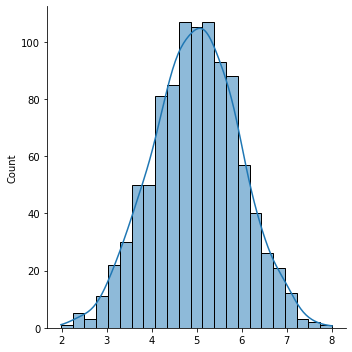

In [5]:
# Plot
import seaborn as sns

sns.displot(x=sim_rand_1k, kde=True)

# Slightly more complicated baseline: Greedy assignment

I.e. start with the highest happiness pair, and work downwards from there.

In [6]:
# Simulate a single instance

# Generate happiness
tmp_happiness = get_happiness(666)

# Order happiness in decreasing order
tmp_happiness = dict(sorted(tmp_happiness.items(), key=lambda item: item[1], reverse=True))

# Iteratively assign
tmp_count_stylist = {k: v for k, v in stylist_workloads.items()}
tmp_count_client = {k: 0 for k in clients}
tmp_assignments = list()
for sc, v in tmp_happiness.items():
    # Get stylist and client separately
    s = sc[0]
    c = sc[1]
    
    # If stylist at capacity, continue
    if tmp_count_stylist[s] == 0:
        print(f'  Continue, stylist {s} at capacity')
        continue
    
    # If client assigned, continue
    if tmp_count_client[c] == 1:
        print(f'  Continue, client {c} assigned')
        continue
        
    # Assign
    print(f'Pairing {s} and {c}')
    tmp_assignments.append((s, c))
    tmp_count_stylist[s] -= 1
    tmp_count_client[c] += 1
    
    # Break if all clients have been assigned
    if 0 not in tmp_count_client.values():
        break

# Get overall happiness outcome
tmp_outcome = [
    tmp_happiness[(s, c)]
    for s, c in tmp_assignments
]

# Print status
print(f'''
Pairings:
{tmp_assignments}

Happiness outcomes:
{tmp_outcome}

Total happiness outcome:
{sum(tmp_outcome)}
''')

#del tmp_happiness, tmp_stylists, tmp_outcome

Pairing Andrew and Ali
Pairing Alex and Jillian
  Continue, client Jillian assigned
Pairing Jesse and Emily
Pairing DeAnna and Trista
Pairing Jesse and Desiree
  Continue, stylist Alex at capacity
Pairing Jesse and Bob
Pairing DeAnna and Aaron
  Continue, stylist DeAnna at capacity
  Continue, client Ali assigned
Pairing Jennifer and Meredith
  Continue, stylist DeAnna at capacity
  Continue, stylist Alex at capacity
  Continue, client Meredith assigned
  Continue, client Bob assigned
  Continue, stylist Alex at capacity
  Continue, stylist Alex at capacity
  Continue, stylist DeAnna at capacity
  Continue, client Desiree assigned
  Continue, stylist Jesse at capacity
  Continue, stylist DeAnna at capacity
Pairing Andrew and Ashley
  Continue, stylist Alex at capacity
  Continue, stylist Jesse at capacity
  Continue, stylist Jesse at capacity
  Continue, stylist DeAnna at capacity
  Continue, stylist Alex at capacity
  Continue, stylist DeAnna at capacity
  Continue, stylist Andrew at 

In [7]:
# Simulate 1k times
def simulate_greedy_assignment(seed=None):
    # Generate happiness
    tmp_happiness = get_happiness(seed)

    # Order happiness in decreasing order
    tmp_happiness = dict(sorted(tmp_happiness.items(), key=lambda item: item[1], reverse=True))

    # Iteratively assign
    tmp_count_stylist = {k: v for k, v in stylist_workloads.items()}
    tmp_count_client = {k: 0 for k in clients}
    tmp_assignments = list()
    for sc, v in tmp_happiness.items():
        # Get stylist and client separately
        s = sc[0]
        c = sc[1]

        # If stylist at capacity, continue
        if tmp_count_stylist[s] == 0:
            continue

        # If client assigned, continue
        if tmp_count_client[c] == 1:
            continue

        # Assign
        tmp_assignments.append((s, c))
        tmp_count_stylist[s] -= 1
        tmp_count_client[c] += 1

        # Break if all clients have been assigned
        if 0 not in tmp_count_client.values():
            break

    # Get overall happiness outcome
    tmp_outcome = [
        tmp_happiness[(s, c)]
        for s, c in tmp_assignments
    ]
    
    return(sum(tmp_outcome))

# Test on previous simulation
simulate_greedy_assignment(666)

7.744836753338426

In [8]:
# Simulate 1k times for different random seeds
sim_greed_1k = [
    simulate_greedy_assignment(i)
    for i in range(1000)
]

np.mean(sim_greed_1k)

7.525586598916969

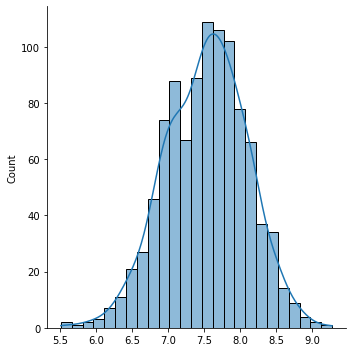

In [9]:
# Plot
sns.displot(x=sim_greed_1k, kde=True)

# Constrained optimization using pyomo

In [10]:
from pyomo import environ as pe
tmp_model = pe.ConcreteModel()

In [11]:
# Define our indices (things our parameters and variables can be defined over)
# -> Here, stylists and clients

tmp_model.stylists = pe.Set(
    initialize=stylist_workloads.keys()
)

tmp_model.clients = pe.Set(
    initialize=clients
)

In [12]:
# Define our parameters (fixed external factors)
# -> Here, our happiness probabilities and stylist workloads

# Generate happiness
tmp_happiness = get_happiness(666)

tmp_model.happiness_probabilities = pe.Param(
    # On pyomo Set objects, the * operator returns the Cartesian product
    tmp_model.stylists * tmp_model.clients,
    # The dictionary mapping (stylist, client) pairs to chances of a happy customers
    initialize = tmp_happiness,
    # Happiness probabilities are real numbers between 0 and 1
    within = pe.UnitInterval
)

tmp_model.stylist_workloads = pe.Param(
    tmp_model.stylists,
    initialize = stylist_workloads,
    within = pe.NonNegativeIntegers
)

In [13]:
# Define our free variables (things we can vary)
# -> Here, just our assignment matrix

tmp_model.assignments = pe.Var(
    # Defined over the client-stylist matrix
    tmp_model.stylists * tmp_model.clients,
    # Possible values are 0 and 1
    domain = pe.Binary
)

In [14]:
# Define our objective
# -> Here the sum of expected happiness * assignment indicator across all possible combinations of stylist-client combinations

tmp_model.objective = pe.Objective(
    expr = pe.summation(tmp_model.happiness_probabilities, tmp_model.assignments),
    sense = pe.maximize
)

In [15]:
# Define our constraints
# -> Here, 
#    1) no stylist can have more than their workload
#    2) each client is assigned to exactly one stylist

def respect_workload(model, stylist):
    # Count up all the clients assigned to the stylist
    n_clients_assigned_to_stylist = sum(
        model.assignments[stylist, client]
        for client in model.clients
    )
    # What's the max number of clients that stylist can work with?
    max_clients = model.stylist_workloads[stylist]
    # Make sure that sum is no more than the stylist's workload
    return n_clients_assigned_to_stylist <= max_clients

tmp_model.respect_workload = pe.Constraint(
    # For each stylist in the set of all stylists
    tmp_model.stylists,
    # Ensure that total assigned clients is at most equal to the workload
    rule = respect_workload
)

def one_stylist_per_client(model, client):
    # Count up all stylists assigned to the client
    n_stylists_assigned_to_client = sum(
        model.assignments[stylist, client]
        for stylist in model.stylists
    )
    # Make sure there is one stylist for each client
    return n_stylists_assigned_to_client == 1

tmp_model.one_stylist_per_client = pe.Constraint(
    # For each client in the set of all clients
    tmp_model.clients,
    # Ensure that exactly one stylist is assigned
    rule = one_stylist_per_client
)

In [16]:
# Solve it!

#import sys
#sys.path.append('C:\\glpk-4.65\\w64')

# Swap out "glpk" for "cbc" or "gurobi" if using another solver
solver = pe.SolverFactory("glpk")
# Add the keyword arg tee=True for a detailed trace of the solver's work.
tmp_solution = solver.solve(
    tmp_model,
    #executable = 'C:\\glpk-4.65\\w64\\glpsol'
)

In [17]:
# Inspect
# -> Each variable has a get_values() method that returns a mapping of indices to optimal values at that index

tmp_assignments = tmp_model.assignments.get_values().items()
for (stylist, client), assigned in sorted(tmp_assignments):
    if assigned == 1:
        print(f'{client.rjust(8)} will be styled by {stylist}')
        
# Get total happiness
sum([
    tmp_happiness[(s, c)]
    for (s, c), a in tmp_assignments
    if a == 1
])

   Byron will be styled by Alex
     Ali will be styled by Andrew
 Jillian will be styled by Andrew
   Aaron will be styled by DeAnna
  Trista will be styled by DeAnna
     Bob will be styled by Jennifer
Meredith will be styled by Jennifer
  Ashley will be styled by Jesse
 Desiree will be styled by Jesse
   Emily will be styled by Jesse


7.863567961746188

In [18]:
# Simulate 1k times
def simulate_optimized_assignment(seed=None):
    # Specify model
    tmp_model = pe.ConcreteModel()
    tmp_model.stylists = pe.Set(
        initialize=stylist_workloads.keys()
    )
    tmp_model.clients = pe.Set(
        initialize=clients
    )
    tmp_happiness = get_happiness(seed)
    tmp_model.happiness_probabilities = pe.Param(
        # On pyomo Set objects, the * operator returns the Cartesian product
        tmp_model.stylists * tmp_model.clients,
        # The dictionary mapping (stylist, client) pairs to chances of a happy customers
        initialize = tmp_happiness,
        # Happiness probabilities are real numbers between 0 and 1
        within = pe.UnitInterval
    )
    tmp_model.stylist_workloads = pe.Param(
        tmp_model.stylists,
        initialize = stylist_workloads,
        within = pe.NonNegativeIntegers
    )
    tmp_model.assignments = pe.Var(
        # Defined over the client-stylist matrix
        tmp_model.stylists * tmp_model.clients,
        # Possible values are 0 and 1
        domain = pe.Binary
    )
    tmp_model.objective = pe.Objective(
        expr = pe.summation(tmp_model.happiness_probabilities, tmp_model.assignments),
        sense = pe.maximize
    )
    tmp_model.respect_workload = pe.Constraint(
        # For each stylist in the set of all stylists
        tmp_model.stylists,
        # Ensure that total assigned clients is at most equal to the workload
        rule = respect_workload
    )
    tmp_model.one_stylist_per_client = pe.Constraint(
        # For each client in the set of all clients
        tmp_model.clients,
        # Ensure that exactly one stylist is assigned
        rule = one_stylist_per_client
    )
    
    # Solve
    tmp_solution = solver.solve(tmp_model)
    tmp_assignments = tmp_model.assignments.get_values().items()
    
    # Get overall happiness outcome
    tmp_outcome = [
        tmp_happiness[(s, c)]
        for (s, c), a in tmp_assignments
        if a == 1
    ]
    
    return(sum(tmp_outcome))

# Test on previous simulation
simulate_optimized_assignment(666)

7.863567961746188

In [19]:
# Simulate 1k times for different random seeds
sim_optimized_1k = [
    simulate_optimized_assignment(i)
    for i in range(1000)
]

np.mean(sim_optimized_1k)

7.903393916484717

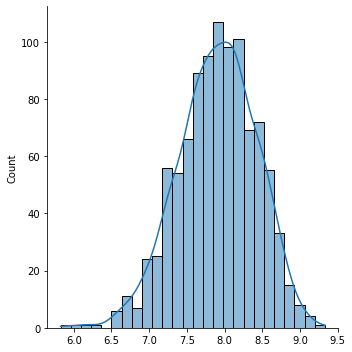

In [20]:
# Plot
sns.displot(x=sim_optimized_1k, kde=True)

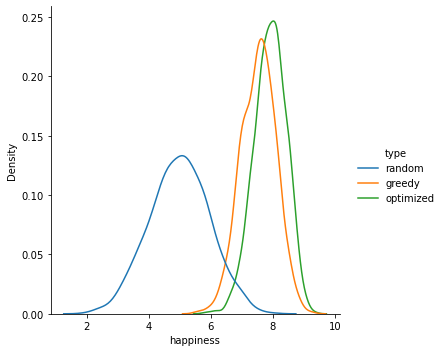

In [21]:
# Plot happiness distributions for each approach on the same graph
import pandas as pd
all_sims = pd.DataFrame(data={
    'type': np.repeat(['random', 'greedy', 'optimized'], 1000),
    'iter': list(range(1, 1001)) * 3,
    'happiness': sim_rand_1k + sim_greed_1k + sim_optimized_1k
})

sns.displot(data=all_sims, x='happiness', hue='type', kind='kde')

# Add in some custom constraints

- Jesse cannot style Jillian
- Cannot pair any stylist/client whose names start with the same letter

In [22]:
# Jesse cannot style Jillian
# -> This is a new constraint
def do_not_pair_jesse_and_jillian(model):
    return model.assignments['Jesse', 'Jillian'] == 0

In [23]:
# Simulate once to verify that it's working
def simulate_optimized_assignment_jessejillian(seed=None):
    # Specify model
    tmp_model = pe.ConcreteModel()
    tmp_model.stylists = pe.Set(
        initialize=stylist_workloads.keys()
    )
    tmp_model.clients = pe.Set(
        initialize=clients
    )
    tmp_happiness = get_happiness(seed)
    tmp_model.happiness_probabilities = pe.Param(
        # On pyomo Set objects, the * operator returns the Cartesian product
        tmp_model.stylists * tmp_model.clients,
        # The dictionary mapping (stylist, client) pairs to chances of a happy customers
        initialize = tmp_happiness,
        # Happiness probabilities are real numbers between 0 and 1
        within = pe.UnitInterval
    )
    tmp_model.stylist_workloads = pe.Param(
        tmp_model.stylists,
        initialize = stylist_workloads,
        within = pe.NonNegativeIntegers
    )
    tmp_model.assignments = pe.Var(
        # Defined over the client-stylist matrix
        tmp_model.stylists * tmp_model.clients,
        # Possible values are 0 and 1
        domain = pe.Binary
    )
    tmp_model.objective = pe.Objective(
        expr = pe.summation(tmp_model.happiness_probabilities, tmp_model.assignments),
        sense = pe.maximize
    )
    tmp_model.respect_workload = pe.Constraint(
        # For each stylist in the set of all stylists
        tmp_model.stylists,
        # Ensure that total assigned clients is at most equal to the workload
        rule = respect_workload
    )
    tmp_model.one_stylist_per_client = pe.Constraint(
        # For each client in the set of all clients
        tmp_model.clients,
        # Ensure that exactly one stylist is assigned
        rule = one_stylist_per_client
    )
    tmp_model.do_not_pair_jesse_and_illian = pe.Constraint(
        # Ensure that exactly one stylist is assigned
        rule = do_not_pair_jesse_and_jillian
    )
    
    # Solve
    tmp_solution = solver.solve(tmp_model)
    tmp_assignments = tmp_model.assignments.get_values().items()
    
    # Get overall happiness outcome
    tmp_outcome = [
        tmp_happiness[(s, c)]
        for (s, c), a in tmp_assignments
        if a == 1
    ]
    
    return(sum(tmp_outcome))

# Test on previous simulation
simulate_optimized_assignment_jessejillian(666)

7.863567961746188

In [24]:
# Simulate 1k times for different random seeds
sim_optimized_jessejillian_1k = [
    simulate_optimized_assignment_jessejillian(i)
    for i in range(1000)
]

np.mean(sim_optimized_jessejillian_1k)

7.834013112743809

In [25]:
# No starting letter pairs
def do_not_pair_starting_letters(model):
    # Count up all stylists assigned to the client
    n_starting_letter_pairs = sum(
        model.assignments[stylist, client]
        for stylist in model.stylists
        for client in model.clients
        if stylist[0] == client[0]
    )
    # Make sure none exist
    return n_starting_letter_pairs == 0

In [26]:
# Simulate once to verify that it's working
def simulate_optimized_assignment_startingpairs(seed=None):
    # Specify model
    tmp_model = pe.ConcreteModel()
    tmp_model.stylists = pe.Set(
        initialize=stylist_workloads.keys()
    )
    tmp_model.clients = pe.Set(
        initialize=clients
    )
    tmp_happiness = get_happiness(seed)
    tmp_model.happiness_probabilities = pe.Param(
        # On pyomo Set objects, the * operator returns the Cartesian product
        tmp_model.stylists * tmp_model.clients,
        # The dictionary mapping (stylist, client) pairs to chances of a happy customers
        initialize = tmp_happiness,
        # Happiness probabilities are real numbers between 0 and 1
        within = pe.UnitInterval
    )
    tmp_model.stylist_workloads = pe.Param(
        tmp_model.stylists,
        initialize = stylist_workloads,
        within = pe.NonNegativeIntegers
    )
    tmp_model.assignments = pe.Var(
        # Defined over the client-stylist matrix
        tmp_model.stylists * tmp_model.clients,
        # Possible values are 0 and 1
        domain = pe.Binary
    )
    tmp_model.objective = pe.Objective(
        expr = pe.summation(tmp_model.happiness_probabilities, tmp_model.assignments),
        sense = pe.maximize
    )
    tmp_model.respect_workload = pe.Constraint(
        # For each stylist in the set of all stylists
        tmp_model.stylists,
        # Ensure that total assigned clients is at most equal to the workload
        rule = respect_workload
    )
    tmp_model.one_stylist_per_client = pe.Constraint(
        # For each client in the set of all clients
        tmp_model.clients,
        # Ensure that exactly one stylist is assigned
        rule = one_stylist_per_client
    )
    tmp_model.do_not_pair_starting_letters = pe.Constraint(
        # Ensure that no start pairs are created
        rule = do_not_pair_starting_letters
    )
    
    # Solve
    tmp_solution = solver.solve(tmp_model)
    tmp_assignments = tmp_model.assignments.get_values().items()
    
    # Get overall happiness outcome
    tmp_outcome = [
        tmp_happiness[(s, c)]
        for (s, c), a in tmp_assignments
        if a == 1
    ]
    
    return(sum(tmp_outcome))

# Test on previous simulation
simulate_optimized_assignment_startingpairs(666)

7.642867416420719

In [27]:
# Simulate 1k times for different random seeds
sim_optimized_startingpairs_1k = [
    simulate_optimized_assignment_startingpairs(i)
    for i in range(1000)
]

np.mean(sim_optimized_startingpairs_1k)

7.537768562073686

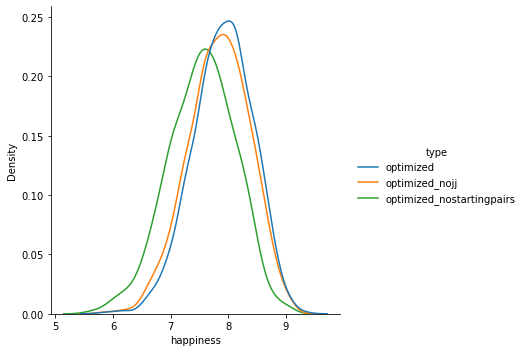

In [28]:
# Plot happiness distributions for this against the previously optimized one
# -> Both should be a bit worse distributionally
# -> Starting pairs <= jesseshould be slightly worse 
all_sims = pd.DataFrame(data={
    'type': np.repeat(['optimized', 'optimized_nojj', 'optimized_nostartingpairs'], 1000),
    'iter': list(range(1, 1001)) * 3,
    'happiness': sim_optimized_1k + sim_optimized_jessejillian_1k + sim_optimized_startingpairs_1k
})

sns.displot(data=all_sims, x='happiness', hue='type', kind='kde')

# Modify assignent constraint

All stylists have capacity for 3 pairings, but can have no more than 2.

In [29]:
# Adjust workloads
stylist_workloads_all3 = {
    "Alex": 3,
    "Jennifer": 3,
    "Andrew": 3,
    "DeAnna": 3,
    "Jesse": 3
}

In [30]:
# Adjust workload constraint
def respect_workload_lte2(model, stylist):
    # Count up all the clients assigned to the stylist
    n_clients_assigned_to_stylist = sum(
        model.assignments[stylist, client]
        for client in model.clients
    )
    # Make sure that sum is no more than the stylist's workload
    return n_clients_assigned_to_stylist <= 2

In [31]:
# Simulate once to verify that it's working
def simulate_optimized_assignment_lte2(seed=None):
    # Specify model
    tmp_model = pe.ConcreteModel()
    tmp_model.stylists = pe.Set(
        initialize=stylist_workloads_all3.keys()
    )
    tmp_model.clients = pe.Set(
        initialize=clients
    )
    tmp_happiness = get_happiness(seed)
    tmp_model.happiness_probabilities = pe.Param(
        # On pyomo Set objects, the * operator returns the Cartesian product
        tmp_model.stylists * tmp_model.clients,
        # The dictionary mapping (stylist, client) pairs to chances of a happy customers
        initialize = tmp_happiness,
        # Happiness probabilities are real numbers between 0 and 1
        within = pe.UnitInterval
    )
    tmp_model.stylist_workloads_all3 = pe.Param(
        tmp_model.stylists,
        initialize = stylist_workloads_all3,
        within = pe.NonNegativeIntegers
    )
    tmp_model.assignments = pe.Var(
        # Defined over the client-stylist matrix
        tmp_model.stylists * tmp_model.clients,
        # Possible values are 0 and 1
        domain = pe.Binary
    )
    tmp_model.objective = pe.Objective(
        expr = pe.summation(tmp_model.happiness_probabilities, tmp_model.assignments),
        sense = pe.maximize
    )
    tmp_model.respect_workload_lte2 = pe.Constraint(
        # For each stylist in the set of all stylists
        tmp_model.stylists,
        # Ensure that total assigned clients is at most equal to the workload
        rule = respect_workload_lte2
    )
    tmp_model.one_stylist_per_client = pe.Constraint(
        # For each client in the set of all clients
        tmp_model.clients,
        # Ensure that exactly one stylist is assigned
        rule = one_stylist_per_client
    )
    
    # Solve
    tmp_solution = solver.solve(tmp_model)
    tmp_assignments = tmp_model.assignments.get_values().items()
    
    # Get overall happiness outcome
    tmp_outcome = [
        tmp_happiness[(s, c)]
        for (s, c), a in tmp_assignments
        if a == 1
    ]
    
    return(sum(tmp_outcome))

# Test on previous simulation
simulate_optimized_assignment_startingpairs(666)

7.642867416420719

In [32]:
# Simulate 1k times for different random seeds
sim_optimized_lte2_1k = [
    simulate_optimized_assignment_lte2(i)
    for i in range(1000)
]

np.mean(sim_optimized_lte2_1k)

7.988683646443642

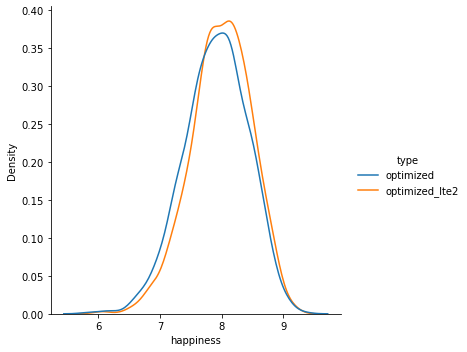

In [33]:
# Plot happiness distributions for this against the previously optimized one
# -> Expect it to be a bit better because there's more room for picking higher happiness numbers due to more potential matches
all_sims = pd.DataFrame(data={
    'type': np.repeat(['optimized', 'optimized_lte2'], 1000),
    'iter': list(range(1, 1001)) * 2,
    'happiness': sim_optimized_1k + sim_optimized_lte2_1k
})

sns.displot(data=all_sims, x='happiness', hue='type', kind='kde')